# ENEE704 Homework 1
Nevo Magnezi

## Problem 1

### Semiconductor Equations:
$$\nabla^2 \phi = \frac{-q}{\epsilon}(p -n + N_{D}^+ - N_A^-)$$ 


 $$
\frac{dn}{dt}= \frac{1}{q} \vec{\nabla} \cdot \vec{J_n} + G_n - R_n $$
 
 
$$
\frac{dp}{dt}= \frac{-1}{q} \vec{\nabla} \cdot \vec{J_p} + G_p - R_p $$ 


$$
\vec{J_n} = -q \mu_n n \nabla \phi + q D_n \nabla n $$


$$ \vec{J_p} = -q \mu_p
p \nabla \phi - q D_p \nabla p $$ 


Let's define R1 as n-type bulk, R2 as
n-type depletion, R3 as p-type depletion, and R4 as p-type bulk. 

### $R_2$ and $R_3$

Assuming steady-state and small depeletion length that does not allow any
generation/recombination (both valid approximations):

a. $\frac{dn}{dt} = 0$
b.
$G_n = R_n = 0$

c. $\frac{dp}{dt} = 0$

d. $G_p = R_p = 0$

Therefore,
$\frac{dJ_n}{dx}=0$ and $\frac{dJ_p}{dx}=0$

$J_n$ and $J_p$ are therefore
constant in depletion region. 

### $R_1$ and $R_4$

If we assume charge
neutrality in bulk region, 

$\frac{d^2\phi}{dx^2} = 0$, therefore $\vec{E}$ is
constant.

with quasi-neutral assumption, we can also assume that $\vec{E}=0$.
In other words, there is no drift current in the bulk region of the diode. This
is not necessarily a good approximation, but it does make analysis a lot easier.
With a steady state assumption:

$$ \frac{1}{q} \frac{dJ_n}{dx} = R_n - G_n $$
$$ \frac{-1}{q} \frac{dJ_p}{dx} = R_p - G_p $$

From Shockley-Read-Hall
recombination as discussed in class, we know:
$$ R_n - G_n = \frac{\Delta n
}{\tau_n}$$
$$ R_p - G_p = \frac{\Delta p}{\tau_p}$$

SRH assumption depends on
assuming few traps (impurities) and that $N_D$ and $N_A$ are significantly
larger than $n_i$. 

And from the quasi-neutral zero E-field assumption:

$$ J_n
= q D_n \frac{dn}{dx}$$
$$ J_p = - q D_p \frac{dp}{dx}$$

We can substitute the
current equations into the continuity equations, and replace the generation and
recombination terms with the SRH assumption to get:

$$\frac{1}{q} q D_n
\frac{d^2 n}{dx^2} = \frac{\Delta n}{\tau_n}$$
$$ \frac{d^2 n}{dx^2} =
\frac{\Delta n}{\tau_n D_n} $$

$$\frac{-1}{q} q D_p \frac{d^2 p}{dx^2} =
\frac{\Delta p}{\tau_p}$$
$$ \frac{d^2 p}{dx^2} = \frac{\Delta p}{\tau_p D_p} $$
$$L_n := \sqrt{D_n \tau_n}$$
$$L_p := \sqrt{D_p \tau_p}$$

Note that $\frac{d^2
p}{dx^2}$ and $\frac{d^2 \Delta p}{dx^2}$ are equivelant because $\Delta p$ is
simply the spatial change in p (the same argument can be made for n). 

$$
\frac{d^2 \Delta n}{dx^2} = \frac{\Delta n}{L_n^2} $$
$$ \frac{d^2 \Delta
p}{dx^2} = \frac{\Delta p}{L_p^2} $$

Solution to these differential equations
is as follows:

$$ \Delta p(x) = C_1 e^{x/L_p} + C_2 e^{-x/L_p}$$
$$ \Delta n(x)
= C_3 e^{x/L_n} + C_4 e^{-x/L_n}$$

$\Delta p(x) = 0$ at $x=-\infty$, therefore:
$$\Delta p(x) = C_1 e^{x/L_p} $$

$\Delta n(x) = 0$ at $x=\infty$, therefore:
$$\Delta n(x) = C_4 e^{-x/L_n} $$

To figure out the last boundary condition in
each equation, we define $x_n$ as the boundary x-value between regions 1 and 2,
and $x_p$ as the boundary x-value between regions 3 and 4. 

We recall that
built-in voltage $\phi_0 = V_T ln(\frac{n_{n0}}{n_{p0}}) = V_T
ln(\frac{p_{p0}}{p_{n0}})$.

Considering adding an applied voltage, 

$$
n(x=x_p) = n_{n0} e^{\frac{V_A-\phi_0}{V_T}} = n_{p0} + \Delta n(x=x_p)$$
$$\Delta n(x=x_p) = n_{n0} e^{-\phi_0/V_T} (e^{\frac{V_A}{V_T}} -1)  = n_{p0}
(e^{\frac{V_A}{V_T}} -1)$$

$$\Delta n(x=x_p)= n_{p0} (e^{\frac{V_A}{V_T}} -1) =
C_4 e^{-x_p/L_n}  $$

$$ C_4 = n_{p0} (e^{\frac{V_A}{V_T}} -1)e^{x_p/L_n}$$

and
analogously, 

$$ C_1 = p_{n0} (e^{\frac{V_A}{V_T}} -1)e^{x_n/L_p}$$

$$\Delta
p(x) = p_{n0} (e^{\frac{V_A}{V_T}} -1)e^{(x_n + x)/L_p}, x \le -x_n$$
$$\Delta
n(x) = n_{p0} (e^{\frac{V_A}{V_T}} -1) e^{(x_p-x)/L_n},  x \ge x_p $$


We can
graph carrier concentrations as follows:

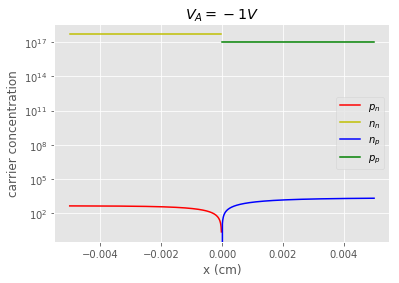

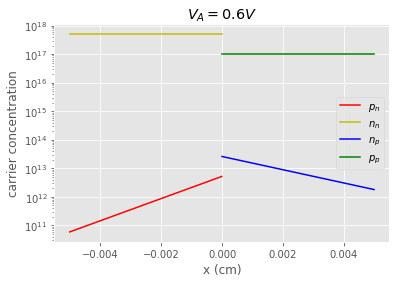

In [12]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('ggplot')

q = 1.6*10**-19
u_n = 1350 # from book
u_p = 480  # from book
V_T = 0.0259
D_n = u_n*V_T
D_p = u_p*V_T
t_n = 10**-7
t_p = 10**-7
n_i = 1.5*10**10
N_A = 10**17
N_D = 5*10**17
A = (100*10**-4)**2

L_p = (D_p*t_p)**0.5
L_n = (D_n*t_n)**0.5
eps = 11.8*8.85*10**-14
V_bi = V_T*math.log(N_A*N_D/(n_i**2))

for V_A in (-1, 0.6): 
    
    xstep = 10**-5
    x_n = (2*eps*N_D*(V_bi-V_A)/(q*N_A*(N_A+N_D)))**0.5
    x_p = (2*eps*N_A*(V_bi-V_A)/(q*N_D*(N_A+N_D)))**0.5

    x_r1 = np.arange(-50*10**-4, -x_n, xstep)
    x_r4 = np.arange(x_p, 50*10**-4, xstep)

    delta_p_n0 = (n_i**2)/N_D * np.exp((x_r1+x_n)/L_p)
    delta_p_n =  delta_p_n0 * (np.exp(V_A/V_T)-1)
    p_n = n_i**2/N_D + delta_p_n

    n_p0 = (n_i**2)/N_A
    delta_n_p0 = n_p0 * np.exp((-x_r4+x_p)/L_n)
    delta_n_p = delta_n_p0 * (np.exp(V_A/V_T)-1)
    n_p = n_p0 + delta_n_p

    fig, ax = plt.subplots()

    N_D_arr = N_D*np.ones((x_r1.shape[0]))
    N_A_arr = N_A*np.ones((x_r4.shape[0]))

    ax.plot(x_r1, p_n, 'r-', label='$p_n$')
    ax.plot(x_r1, N_D_arr-p_n, 'y-', label='$n_n$')
    ax.plot(x_r4, n_p, 'b-', label='$n_p$')
    ax.plot(x_r4, N_A_arr-n_p, 'g-', label='$p_p$')

    ax.set(xlabel='x (cm)', ylabel='carrier concentration', yscale='log', title='$V_A=' + str(V_A) +'V$')

    ax.legend()
    


### Determining Currents

Substituting the derived excess carrier concentration
equations into the current semiconductor equation yields:

$$I_p (x) = \frac{-q
D_p A}{L_p} p_{n0} (e^{\frac{V_A}{V_T}} -1)e^{(x_n + x)/L_p}, x \le -x_n$$
$$I_n
(x) = \frac{-q D_n A}{L_n} n_{p0} (e^{\frac{V_A}{V_T}} -1) e^{(x_p-x)/L_n},  x
\ge x_p $$

Recall that, at the depletion region, both types of current are
constant. We can calculate what the total current is by summing the n current
and the p current as their respective boundaries. 

$$ I_{tot} = I_p (x=-x_n) +
I_n(x=x_p) = -q A n_i^2 (e^{V_A/V_t} -1)  \big[\frac{D_n}{L_n N_A} +
\frac{D_p}{L_p N_D}\big]$$

Thus, 

$$I_p(x>x_p) = I_{tot} - I_n(x)$$
$$ I_n(x <
-x_n) = I_{tot} - I_p(x)$$

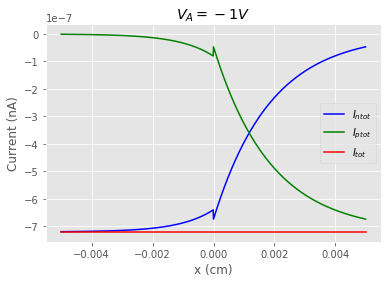

In [2]:
for V_A in (-1, 0.6):
    i_np = A*q*D_n*n_i**2*(np.exp(V_A/V_T)-1)*np.exp((x_p-x_r4)/L_n)/(L_n *N_A)
    i_np0 = i_np[0]

    i_pn = A*q*D_p*n_i**2*(np.exp(V_A/V_T)-1)*np.exp((x_n+x_r1)/L_p)/(L_p * N_D)
    i_pn0 = i_np[-1]

    i_tot = i_np0 + i_pn0

    x_depletion = np.arange(-x_n, x_p-2*xstep, xstep)

    i_pdepletion = i_pn0*np.ones((x_depletion.shape[0]))
    i_ndepletion = i_np0*np.ones((x_depletion.shape[0]))

    i_pp = i_tot - i_np
    i_nn = i_tot - i_pn
    i_ptot = np.append(i_pn, i_pdepletion) 
    i_ptot = np.append(i_ptot, i_pp)
    i_ntot = np.append(i_nn, i_ndepletion)
    i_ntot = np.append(i_ntot, i_np)

    fig, ax = plt.subplots()

    x = np.arange(-50*10**-4, 50*10**-4, xstep)
    ax.plot(x, 1e9*i_ntot, 'b-', label='$I_{ntot}$')
    ax.plot(x, 1e9*i_ptot, 'g-', label='$I_{ptot}$')
    ax.plot(x, 1e9*i_ptot+1e9*i_ntot, 'r-', label='$I_{tot}$')

    ax.set(xlabel='x (cm)', ylabel='Current (nA)',title='$V_A=' + str(V_A) +'V$')

    ax.legend()

## Problem 3

Using the total current equation calculated above, we can graph
the I-V relationship. 

$$ I_{tot} = I_p (x=-x_n) + I_n(x=x_p) = -q A n_i^2
(e^{V_A/V_t} -1)  \big[\frac{D_n}{L_n N_A} + \frac{D_p}{L_p N_D}\big]$$

[Text(0,0.5,'Current (A)'), Text(0.5,0,'Applied Voltage (V)')]

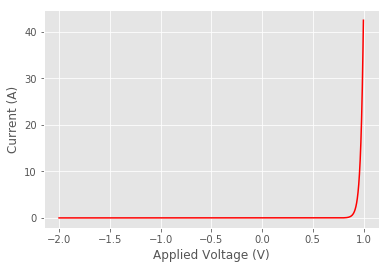

In [3]:
V_A = np.arange(-2, 1, 0.001)
i_np0 = A*q*D_n*n_i**2*(np.exp(V_A/V_T)-1)/(L_n*N_A)

i_pn0 = A*q*D_p*n_i**2*(np.exp(V_A/V_T)-1)/(L_p*N_D)

i_tot = i_np0 + i_pn0

fig, ax = plt.subplots()
ax.plot(V_A, i_tot, 'r-')

ax.set(xlabel='Applied Voltage (V)', ylabel='Current (A)')


[None, Text(0,0.5,'Current (A)'), Text(0.5,0,'Applied Voltage (V)')]

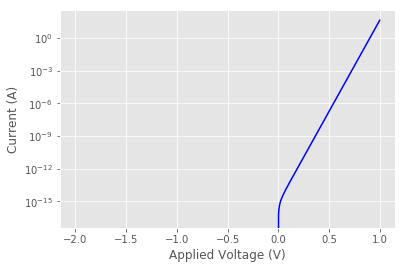

In [4]:
fig, ax = plt.subplots()
ax.plot(V_A, i_tot, 'b-', label='$I_{tot}$')
ax.set(xlabel='Applied Voltage (V)', ylabel='Current (A)', yscale='log')

## Problem 4

There are 2 types of capacitance: junction (from the seperation of
charge across the depletion region), and diffusion (from the minority carriers
that diffuse across the depletion region and create a current). Both are small
signal capacitances. 

From the text: 

$$C_J = A\sqrt{\frac{q\epsilon}{2(\phi_0
- V_A)}N_D \parallel N_A}$$

In [5]:
V_A = np.arange(-2, V_bi, 0.001)
C_j = A*(q*eps*N_D*N_A/(2*(V_bi-V_A)*(N_D+N_A)))**0.5
fig, ax = plt.subplots()
ax.plot(V_A, C_j, 'r-', label='$C_{j}$')
ax.set(xlabel='Applied Voltage (V)', ylabel='capacitance (F)', yscale='log')


[None, Text(0,0.5,'capacitance (F)'), Text(0.5,0,'Applied Voltage (V)')]

For diffusion capacitance:

$$C_{diff} = \frac{A q n_i^2}{V_T} e^{V_A/V_T}
(L_n/N_A + L_p/N_D)$$

[None, Text(0,0.5,'capacitance (F)'), Text(0.5,0,'Applied Voltage (V)')]

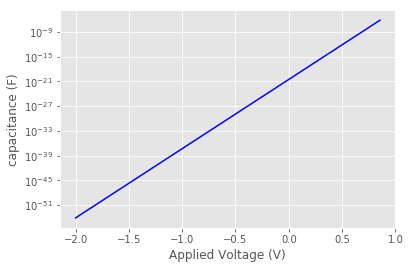

In [6]:
V_A = np.arange(-2, V_bi, 0.001)
C_diff = A*q*(L_n/N_A + L_p/N_D)*n_i**2*np.exp(V_A/V_T)/V_T
fig, ax = plt.subplots()
ax.plot(V_A, C_diff, 'b-', label='$C_{diff}$')
ax.set(xlabel='Applied Voltage (V)', ylabel='capacitance (F)', yscale='log')


Total Capacitance:


[None, Text(0,0.5,'capacitance (F)'), Text(0.5,0,'Applied Voltage (V)')]

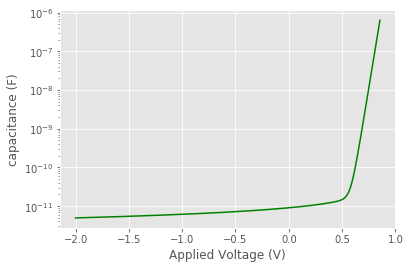

In [7]:
print('Total Capacitance:')

fig, ax = plt.subplots()
ax.plot(V_A, C_diff+C_j, 'g-', label='$C_{tot}$')
ax.set(xlabel='Applied Voltage (V)', ylabel='capacitance (F)', yscale='log')


## Problem 5

Series resistance comes from the sum of the bulk n-type resistance
on the n-side and the bulk p-type resistance on the p-side. The depletion region
length is very small compared to the bulk length, thus we will ignore it for the
calculations of resistance. We will also ignore minority carrier contributions
to resistance as it is negligible.

$$R_{tot} = R_n + R_p = \frac{ L}{2 A
\sigma_n} + \frac{ L}{2 A \sigma_p}$$
$$= \frac{L}{2Aq}(\frac{1}{\mu_n N_D}
+\frac{1}{ \mu_p N_A})$$

In [8]:
l = 100*10**-4
sigma_n = q*u_n*N_D
sigma_p = q*u_p*N_A
rho_n = 1/sigma_n
rho_p = 1/sigma_p
r_tot = (l/(2*A))*(rho_n+rho_p)
print(r_tot)
print('ohms')

6.973379629629628
ohms


## Problem 6

For low frequencies, the diode capacitance is large, and little AC
current can flow through the diode. For high frequencies, the capacitors
impedance becomes much smaller, and the only impedance is the (very small) bulk
resistance. for a particular operating point:

$$f_{3DB} = \frac{1}{2\pi
R_{bulk}C_{op}}$$

e.g. , if I select a diode voltage of around 0.6V, total
capacitance is 100pF, $f_{3DB} = 228 MHz$.

## Problem 7

Let's define worst
case capacitance as that of at $V_A= 0.7$V.

In [9]:
index = int((2+0.7)/0.001)
print('Total Capacitance at V_A=0.7V')
c_tot = (C_j[index] + C_diff[index])
print(c_tot)

Total Capacitance at V_A=0.7V
1.6113022932959498e-09


Let's say that the device being on means the capacitor is 95 percent charged.
This means we want:

$$0.95 = 1 - e^{-t/RC}$$
$$t = RC ln(1/0.05) $$

In [10]:
delay = r_tot*c_tot*math.log(1/0.05)
print(delay*1e9)
print('nanoseconds')

33.66071464343908
nanoseconds


## Problem 8

Without charge neutrality in the bulk region, excess carriers
would contribute to the built-in voltage of the pn junction. Uncompensated
carriers would contribute to space charge and would therefore be part of the
depletion region rather than the bulk regions. 

To help answer this question,
we can also consider why there is a depletion region. majority carriers on each
respective side are initially adjacent to minority carriers on the opposite
side. the spatial derivative leads to a diffusion current that is balanced out
by a drift current caused by the built in voltage space-charge distribution.
Eventually an equilibrium is reached in the depletion region, where there is not
charge neutrality. Outside the region, however, charge neutrality is still
maintained.


## Problem 9

Let's define:

$$I_0 = A q n_i^2 (\frac{D_n}{L_n
N_A} +
\frac{D_p}{L_p N_D})$$
$$C_{tot} [n] = C_{tot} (V_C[n])  = C_j + C_{diff}
$$,
which is defined above


$$R = 7 \Omega$$
$$V_{in}=0.7$$ (assuming step
function
begins at t=0)


$$\Delta t = 1ps$$

We can solve for $\Delta V_C$ as
follows:
$$\Delta V_C[n] = V_C[n+1]-V_C[n] = \frac{V_C [n] - V_{in} - R
I_0(e^{V_C[n]/V_T} -1)}{RC_{tot}[n]}\Delta t$$

With the initial condition
$V_C[0] = 0$V and for $n\in [0, N)$,hi $N=5000$

In [13]:
V_C = 0
delta_t = 1e-12
R = 7
I_0 = A*q*n_i**2*(D_n/(L_n*N_A) + D_p /(L_p*N_D))
V_in = 0.7
N = 5000
V_C = np.zeros((N))
delta_V_C = 0
for i in range(1, N, 1):
    C_j = A*(q*eps*N_D*N_A/(2*(V_bi-V_C[i-1])*(N_D+N_A)))**0.5
    C_diff = A*q*(L_n/N_A + L_p/N_D)*n_i**2*np.exp(V_C[i-1]/V_T)/V_T
    I_diode = I_0*(math.exp(V_C[i-1]/V_T) -1)
    delta_V_C = delta_t*(V_in+ R*I_diode-V_C[i-1])/(R*(C_j+C_diff))
    V_C[i] = V_C[i-1] + delta_V_C
    
    
fig, ax = plt.subplots()
ax.plot(delta_t*np.arange(N),V_C, 'b-', label='$V_C$')
ax.set(xlabel='Time (s)', ylabel='Voltage (V)')
plt.show()

delay = delta_t * (np.abs(V_C - 0.7*0.95)).argmin()
print('real delay to 95 percent charged is ' + str(delay) + ' seconds')

real delay to 95 percent charged is 1.682e-09 seconds
